In [210]:
#import sys
#reload(sys)
#sys.setdefaultencoding('utf8')

In [1]:
print(1)

1


In [2]:
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy
import numpy as np

In [3]:
data=pd.read_excel("C:\\Users\\HP\\Documents\\Deepak\\ALabs\\proj\\5. Bank Reviews-Complaints Analysis\\BankReviews.xlsx")

In [4]:
to_predict = pd.read_excel("C:\\Users\\HP\\Documents\\Deepak\\ALabs\\proj\\5. Bank Reviews-Complaints Analysis\\to_predict.xlsx" , )

In [5]:
#data.Reviews.encode('ascii', 'ignore').decode('ascii')

In [6]:
to_predict.head()

,Reviews_analyse
0,\r\nI had an awful experience with Reliance wh...
1,\r\nMy experience with Reliance wasn't good at...
2,\r\nNothing was as originally stated. My clos...
3,Great web interface for both the loan applicat...
4,Chaz was fantastic throughout the entire lendi...


In [7]:
data = data.replace('\n','', regex=True)
to_predict = to_predict.replace('\n','', regex=True)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [9]:
data.drop(['Date','BankName'],axis=1,inplace=True)

In [10]:
data.head(5)

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...


In [11]:
data.Stars.value_counts()

5    410
1     95
Name: Stars, dtype: int64

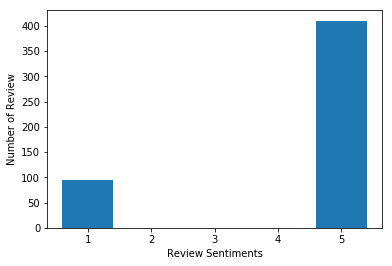

In [12]:
Sentiment_count=data.groupby('Stars').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Reviews'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Reviews'])


In [14]:
#cv.vocabulary_

In [15]:
CountVectorizer?

In [16]:
to_predict_counts = cv.fit_transform(to_predict['Reviews_analyse'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Stars'], test_size=0.3, random_state=1)

In [18]:
X_train

<353x2454 sparse matrix of type '<type 'numpy.int64'>'
	with 10212 stored elements in Compressed Sparse Row format>

In [19]:
to_predict_counts.shape

(6, 186)

In [20]:
X_train.shape , y_train.shape, X_test.shape , y_test.shape
#print("Number transactions X_test dataset: ", X_test.shape) 
#print("Number transactions y_test dataset: ", y_test.shape) 


((353, 2454), (353L,), (152, 2454), (152L,))

<h2> Bag of words result </h2>

In [21]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

('MultinomialNB Accuracy:', 0.9605263157894737)


In [22]:
#Evalution of train and test accuracy
from sklearn import metrics
test_accuracy=metrics.accuracy_score(y_test,clf.predict(X_test))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(y_train,clf.predict(X_train))
print('train_accuracy: ',train_accuracy)

('test_accuracy: ', 0.9605263157894737)
('train_accuracy: ', 0.9915014164305949)


Text(0.5,15,'Predicted label')

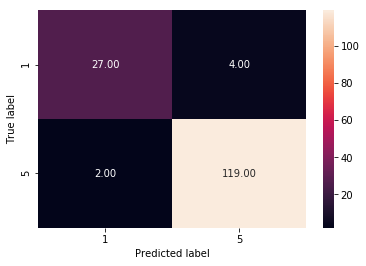

In [23]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,
                            clf.predict(X_test), [1,5] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [24]:
#Concatenating final prediction with original data set(all obersvations):

pred_stars=pd.DataFrame(clf.predict(text_counts),columns=['predicted_stars'])
  
testfileNB = pd.concat([data, pred_stars], axis=1)

testfileNB.head(10)

,Stars,Reviews,predicted_stars
0,5,"Great job, Wyndham Capital! Each person was pr...",5
1,5,Matthew Richardson is professional and helpful...,5
2,5,We had a past experience with Wyndham Mortgage...,5
3,5,We have been dealing with Brad Thomka from the...,5
4,5,I can't express how grateful I am for the supp...,5
5,5,I had the pleasure of working with Wyndham Cap...,5
6,5,My experience with Mattison was beyond greatly...,5
7,5,Patrick answered all my questions by email imm...,5
8,5,I loved working with this group of people! The...,5
9,5,Great web interface for both the loan applicat...,5


In [25]:
text_counts.shape

(505, 2454)

In [27]:
#to_pred_stars=pd.DataFrame(clf.predict(to_predict_counts),columns=['predicted_stars'])
  
#to_pred_testfileNB = pd.concat([to_predict, pred_stars], axis=1)

#to_pred_titestfileNB.head(10)

In [ ]:
#clf.predict(to_predict_counts)

<h2> TF-IDF result</h2>

In [248]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Reviews'])

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Stars'], test_size=0.3, random_state=123)

In [250]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

Text(0.5,15,'Predicted label')

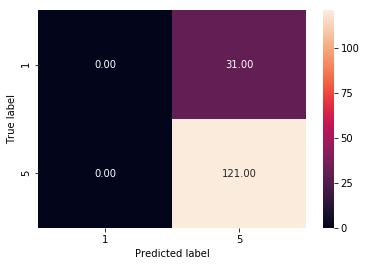

In [251]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,
                            clf.predict(X_test), [1,5] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [252]:
#Concatenating final prediction with original data set(all obersvations):

pred_stars=pd.DataFrame(clf.predict(text_tf),columns=['predicted_stars'])
  
testfile = pd.concat([data, pred_stars], axis=1)

testfile.head(10)

,Stars,Reviews,predicted_stars
0,5,"Great job, Wyndham Capital! Each person was pr...",5
1,5,Matthew Richardson is professional and helpful...,5
2,5,We had a past experience with Wyndham Mortgage...,5
3,5,We have been dealing with Brad Thomka from the...,5
4,5,I can't express how grateful I am for the supp...,5
5,5,I had the pleasure of working with Wyndham Cap...,5
6,5,My experience with Mattison was beyond greatly...,5
7,5,Patrick answered all my questions by email imm...,5
8,5,I loved working with this group of people! The...,5
9,5,Great web interface for both the loan applicat...,5


In [253]:
testfile.astype(str)

,Stars,Reviews,predicted_stars
0,5,"Great job, Wyndham Capital! Each person was pr...",5
1,5,Matthew Richardson is professional and helpful...,5
2,5,We had a past experience with Wyndham Mortgage...,5
3,5,We have been dealing with Brad Thomka from the...,5
4,5,I can't express how grateful I am for the supp...,5
5,5,I had the pleasure of working with Wyndham Cap...,5
6,5,My experience with Mattison was beyond greatly...,5
7,5,Patrick answered all my questions by email imm...,5
8,5,I loved working with this group of people! The...,5
9,5,Great web interface for both the loan applicat...,5


In [254]:
#Exporting testfile to csv for final submission

testfileNB.to_csv("Review_submissionNB.csv")